In [54]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import nibabel as nib
import dipy.align.imwarp 
import os.path
from dipy.viz import regtools
import skimage.io as io
import dipy.align.imwarp as imwarp
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.imwarp import DiffeomorphicMap
from dipy.align.metrics import CCMetric
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

from dipy.align.imaffine import (AffineMap,MutualInformationMetric,AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D, RigidTransform3D,AffineTransform3D)


(91, 109, 91)
(4, 4)
(91, 109, 91)


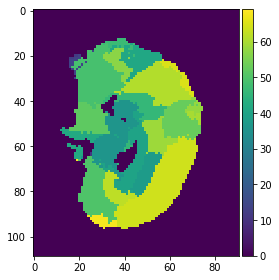

In [55]:
img = nib.load('/Users/xueminzhu/desktop/test/tests_input/desikan_space-MNI152NLin6_res-2x2x2_reor_RAS_nores_aligned_atlas_t1w_mni.nii.gz')
ref = nib.load('/Users/xueminzhu/desktop/test/tests_input/t1w_brain_nores.nii.gz')
print(img.shape)
print(img.affine.shape)
img_arr = img.get_fdata()
print(img_arr.shape)
io.imshow(img_arr[46])

#img_data = moving_img.get_data()
img_affine = img.affine
ref_data = ref.get_data()
ref_affine = ref.affine

level_iters = [10, 10, 5]
sigmas = [3.0, 1.0, 0.0]
factors = [4, 2, 1]

affreg = AffineRegistration(metric=metric,level_iters=level_iters,sigmas=sigmas,factors=factors)

In [56]:
transform = TranslationTransform3D()
params0 = None
translation = affreg.optimize(ref_data, img_arr, transform, params0,ref_affine, img_affine)

rigid = affreg.optimize(ref_data, img_arr, transform, params0,ref_affine, img_affine,starting_affine = translation.affine)
affine = affreg.optimize(ref_data, img_arr, transform, params0,ref_affine, img_affine,starting_affine=rigid.affine)

metric = CCMetric(3)
level_iters = [10, 10, 5]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)

Optimizing level 2 [max iter: 10]


AttributeError: 'CCMetric' object has no attribute 'setup'

In [31]:
mapping = sdr.optimize(ref, img, ref_affine,img_affine)

AttributeError: 'Nifti1Image' object has no attribute 'astype'

In [6]:
pre_align = np.array([[1.02783543e+00, -4.83019053e-02, -6.07735639e-02, -2.57654118e+00],
                      [4.34051706e-03, 9.41918267e-01, -2.66525861e-01, 3.23579799e+01],
                      [5.34288908e-02, 2.90262026e-01, 9.80820307e-01, -1.46216651e+01],
                      [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [7]:
from dipy.align.imaffine import AffineMap
affine_map = AffineMap(pre_align,
                       static.shape, static_affine,
                       moving.shape, moving_affine)

resampled = affine_map.transform(moving)

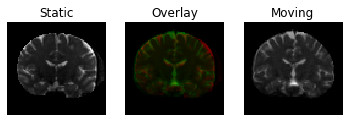

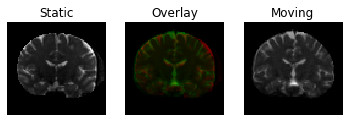

In [8]:
regtools.overlay_slices(static, resampled, None, 1, 'Static', 'Moving', 'input_3d.png')

In [9]:
metric = CCMetric(3)

In [10]:
level_iters = [10, 10, 5]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)